Human-Centrerd Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/Summer-Term-2022/course_human_centered_data_science.html)) - Summer Term 2022 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A1 - WarumUP

During the exercises you will be reading and writing Python code in Jupyter notebooks. Let's unpack this a bit!

🐍 Python is a programming language that has gained considerable traction over the last years, in various contexts, including data science and the digital humanities. If you have never written any Python before, it would be useful for you to familiarize yourself with the language, its basic constructs and conventions. It is popular for its versatility and readability. Speaking of which…

📗 Jupyter notebooks are hybrid documents that contain both code and markup. So it becomes easy to mix programming and documentation. What you are looking at now is a text cell written in the markup language Markdown, further below you see code cells written in the programming language Python (note the light grey background), which contain computable code! When viewing the notebooks in Jupyter, you can double-click on any text cell to see its source.

In this exercise you will get a bit acquainted with Python and Jupyter, and get to know a few handy libraries for working with data. If you already have experience, then it's still a good recap!

## 🌍 Hello world 

Okay, enough words. Let's dive right into it and start with a classic:

In [1]:
print("hello world")

hello world


The above code cell can be executed (i.e., run) by clicking `Shift + Enter`. Check out some CheatSheets [[1](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)] or [[2](https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/)]❗

Of course we can set variables and extend them. Feel free to change the message:

In [2]:
hello = "hello world"
hello = hello + " how are you!"
hello

'hello world how are you!'

Now that we have our first variable `hello` we can perform some string tricks, for example, we could change the capitalization. Please note: This will not change the variable `hello` itself , but will just return a capitalized new string.

In [3]:
hello.title()

'Hello World How Are You!'

In [4]:
hello.upper()

'HELLO WORLD HOW ARE YOU!'

✏️ *Now it's your turn! The pencil stands for a small hands-on activity!*

Try some string manipulations yourself. To get some inspiration, have a look at the [string methods](https://docs.python.org/3/library/stdtypes.html?#string-methods) that Python has built-in. Read the docs.

In [9]:
# Hands-on inspirations, check out the following!
# hello.center(30,'#')
# hello.count('o')
# hello.find('w')
# hello.swapcase()
# hello.startswith('hello')
# hello.endswith('hello')
# hello.split(' ')
hello.rjust(40, '_')

'________________hello world how are you!'

## 📦 Let's get some packages

Python itself provides only limited methods for working with more complex data. One of the main reasons for Python's (and  Jupyter's) popularity is the wide availability of software packages that provide powerful means for preparing, processing, presenting, and probing data. Throughout the exercises you will get to know a few packages, some of them highly specific tools and others more general-purpose libraries.

In [10]:
import pandas as pd

Now the powerful `pandas` package is loaded and will answer to its nickname `pd`.

🐼 [Pandas](https://pandas.pydata.org) really is a data analysis workhorse with the DataFrame data structure being one of its main muscles. You will learn to love it! With pandas you can do simple and sophisticated operations over small and sizable datasets.

Let's create a little toy dataset to give you a sense of how it works:

In [11]:
edits_data = pd.read_csv("page-edits-data.csv", index_col=0)

This sample data `edits_data` contains the page edits of the Wikipedia article `COVID-19_pandemic` from 2020 differentiated by `editor-type`.

To check whether the DataFrame was created successfully, we can type the variable name `edits_data`, to display its content as an output:

In [12]:
edits_data

,timestamp,all-editor-types,anonymous,group-bot,name-bot,user
0,2020-01-01T00:00:00.000Z,0,0,0,0,0
1,2020-01-02T00:00:00.000Z,0,0,0,0,0
2,2020-01-03T00:00:00.000Z,0,0,0,0,0
3,2020-01-04T00:00:00.000Z,0,0,0,0,0
4,2020-01-05T00:00:00.000Z,3,0,0,0,3
...,...,...,...,...,...,...
269,2020-09-26T00:00:00.000Z,6,0,0,0,6
270,2020-09-27T00:00:00.000Z,10,0,0,0,10
271,2020-09-28T00:00:00.000Z,12,0,0,0,12
272,2020-09-29T00:00:00.000Z,7,0,0,0,7


The output generated by a code cell is printed right below it. In the case of a DataFrame we get a table. By convention, the rows are the data entries and the columns are the data dimensions. The first column on the left side is the index. You can also use `.info()` to get a summary of that dataframe.

In [13]:
edits_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   timestamp         274 non-null    object
 1   all-editor-types  274 non-null    int64 
 2   anonymous         274 non-null    int64 
 3   group-bot         274 non-null    int64 
 4   name-bot          274 non-null    int64 
 5   user              274 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 15.0+ KB


Now let's do something with our newly created DataFrame. For example, we could get the largest amount of edits by editor-type `user` using the ```max``` method.

In [14]:
edits_data["user"].max()

702

*✏️ What would it take to get the highest value of anonymous users?*

In [15]:
edits_data["anonymous"].max()

201

To get the entry belonging to the biggest amount of anonymous user, one needs to `loc`ate it via its index:

In [16]:
edits_data.loc[edits_data.anonymous.idxmax()]

timestamp           2020-01-26T00:00:00.000Z
all-editor-types                         904
anonymous                                201
group-bot                                  1
name-bot                                   0
user                                     702
Name: 25, dtype: object

Note: To access a specific column you can use (1) the dot operator (as with `.anonymous`) or passing a string to the indexing operator (as with `["users"]`).

We can also calculate averages for each numeric column by selecting them first and then calculating the mean:

In [17]:
edits_data[['user', 'anonymous', 'group-bot', 'name-bot']].mean(axis=0)

user         78.642336
anonymous     2.671533
group-bot     0.616788
name-bot      0.018248
dtype: float64

There is so much more to discover, some of which you will do over the course of the exercise. The [DataFrame page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) in the pandas reference gives a complete (long) list of all methods provided by the data structure. 

If you want to do something specific, but do not know the particular method name, a well-formulated search query in your favorite seach engine can help. In particular, the discussions on Stack Overflow contain various helpful entries. Quite often it is the case that somebody else has had a similar problem that you're trying to solve. The key then is to precisely formulate your query. For this, it is good to understand the basic terminology of Python, pandas, etc.

## 🌠 Let's reach for the stars ... 

... and plot some data. For data visualization we now just use the library `Matplotlib`. You can use any other library for plotting you are familiar with ([plotly](https://plotly.com/python/), [seaborn](https://seaborn.pydata.org/), [ggpot(2)](https://plotnine.readthedocs.io/en/stable/index.html), [altair](https://altair-viz.github.io/), [pygal](http://www.pygal.org/en/stable/)) or just use the one, which comes with pandas.

We will visualize the ratio of editor types using different kinds of charts, first using `pandas` itself and then `matplotlib`. First, we have to prepare the data a bit. Second, we calculate the `sum()` per column, make a Dataframe `to_frame()` out of it (cause it returns a `Series`), and then drop the first three rows using `iloc[]`, cause we don't need them.

In [71]:
plot_data = edits_data.sum().to_frame(name="groups").iloc[2:]

In [72]:
plot_data

,groups
anonymous,732
group-bot,169
name-bot,5
user,21548


Let's create some basic bar plot:

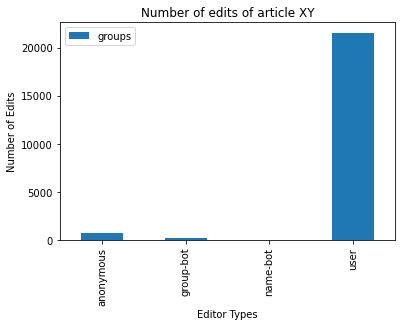

In [73]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

ax = plot_data.plot.bar()

ax.set_xlabel('Editor Types')
ax.set_ylabel('Number of Edits')
ax.set_title('Number of edits of article XY')

plt.show()

*✏️ Plot a horizontal bar chart.*

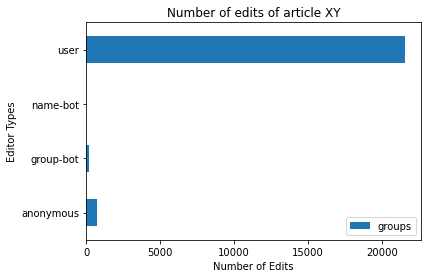

In [79]:
ax = plot_data.plot.barh()
ax.set_xlabel('Number of Edits')
ax.set_ylabel('Editor Types')
ax.set_title('Number of edits of article XY')

plt.show()

✏️ Now, plot a pie chart using your own color map!*

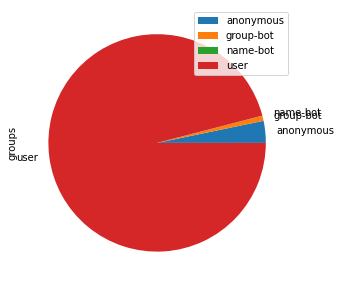

In [92]:
ax = plot_data.plot.pie(y = "groups", figsize = (5,5))

## 👀 Data wrangling
This part of the exercise shows you a few tricks for preparing data for visualization. You will see how data can be loaded, parsed, and examined. For this we will continue to work with the **Pandas** package, in particular with the DataFrame data structure, and get to know a few additional helpers. 

### Loading 

The first step is to bring the data into the purview of your notebook. So regardless of data structure and format, you need to have access to the data set. We will briefly cover four common ways of loading data into your Jupyter notebook.

#### Enter data directly

The simplest way to add data to your notebook is to enter it verbatim into the notebook as we have seen with the capital cities in the first tutorial:

In [94]:
cities = pd.DataFrame({
  "name": ["Athens", "Bratislava", "Copenhagen", "Dublin"],
  "area": [39, 367.6, 86.2, 115],
  "elevation": [170, 152, 14, 20],
  "population": [664046, 429564, 602481, 553165]
  }
)

cities

,name,area,elevation,population
0,Athens,39.0,170,664046
1,Bratislava,367.6,152,429564
2,Copenhagen,86.2,14,602481
3,Dublin,115.0,20,553165


✏️ *Add a column for years when you have visited or plan to visit these cities*


In [96]:
cities['years'] = [2000, 2021, 2019, 2022]
cities

,name,area,elevation,population,years
0,Athens,39.0,170,664046,2000
1,Bratislava,367.6,152,429564,2021
2,Copenhagen,86.2,14,602481,2019
3,Dublin,115.0,20,553165,2022


#### Open a local file

You might also want to open a local file. We can open a file using Python's built-in `Zipfile` method in a context manager, after which we can `read()` its contents into the variable `covid_json`. The file is automatically closed when the context manager block is left. In this case the data is in the JSON format, which we will need to parse. We'll get to this later. You can open all kinds of formats. Here we know that we are dealing with a JSON file because of its extension.

In [97]:
from zipfile import ZipFile

with ZipFile("owid-covid-data.zip", 'r') as file:
    covid_json = file.read('owid-covid-data.json')

In [98]:
covid_json[:500] # this displays the first 500 characters

b'{\n    "AFG": {\n        "continent": "Asia",\n        "location": "Afghanistan",\n        "population": 38928341.0,\n        "population_density": 54.422,\n        "median_age": 18.6,\n        "aged_65_older": 2.581,\n        "aged_70_older": 1.337,\n        "gdp_per_capita": 1803.987,\n        "cardiovasc_death_rate": 597.029,\n        "diabetes_prevalence": 9.59,\n        "handwashing_facilities": 37.746,\n        "hospital_beds_per_thousand": 0.5,\n        "life_expectancy": 64.83,\n        "human_developm'

#### Get data via a URL

There are some methods that can directly load a dataset via a URL, i.e., a web address. For others you might have to retrieve the file first to continue parsing it. The `requests` package helps you to send HTTP requests and retrieve the responses. 

In the following, the news feed of Tagesschau is retrieved via an HTTP GET request. Note that the news feed is made available as an XML format; of course, you can retrieve all kinds of file formats using this method:

In [99]:
import requests

response = requests.get('https://www.tagesschau.de/xml/rss2/')
tagesschau_xml = response.text
tagesschau_xml[:500]

'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n<rss version="2.0" xmlns:content="http://purl.org/rss/1.0/modules/content/">\n  <channel>\n    <title>tagesschau.de - Die Nachrichten der ARD</title>\n    <link>https://www.tagesschau.de</link>\n    <description>tagesschau.de</description>\n    <language>de</language>\n    <copyright>ARD-aktuell / tagesschau.de</copyright>\n    <lastBuildDate>Mon, 09 May 2022 18:45:27 +0200</lastBuildDate>\n    <docs>http://blogs.law.harvard.edu/tech/rss</docs>\n    <ttl>10</ttl>\n  '

✏️ *Find the news feed for another webpage and try to load it!*

In [100]:
response = requests.get('https://www.berliner-zeitung.de/news/verbot-von-ukraine-fahnen-berliner-senat-veroeffentlicht-klarstellung-li.226538')
berliner_z_xml = response.text
berliner_z_xml[:500]

'\n<!doctype html>\n<html lang="de">\n  <head>\n    <meta charset="utf-8">\n    <meta name="apple-itunes-app" content="app-id=1401223428">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta http-equiv="pragma" content="no-cache"/>\n    <meta http-equiv="Content-Language" content="de">\n    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png?v=WG268x3wXy">\n    '

#### Use an API

Some web platforms require the use of an API (application programming interface) to get access to their data. An API is a structured way to request and retrieve data. Oftentimes it is just a specific way to format the URL. The wikipedia edits data set we used in the beginning of this exercise was retrieved by using the [Wikimedia API](https://wikimedia.org/api/rest_v1/).

In [106]:
headers = {
    'User-Agent': 'https://github.com/YOURUSERNAME',
    'From': 'YOURMAIL'
}

# Edpoint for getting Edits per Page
ep = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/en.wikipedia/Amy_Coney_Barrett/all-editor-types/daily/20200101/20201030'

call = requests.get(ep, headers=headers)
response = call.json()

In [107]:
response

{'items': [{'project': 'en.wikipedia',
   'editor-type': 'all-editor-types',
   'page-title': 'Amy_Coney_Barrett',
   'granularity': 'daily',
   'results': [{'timestamp': '2020-01-01T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-02T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-03T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-04T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-05T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-06T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-07T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-08T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-09T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-10T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-11T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-12T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-13T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-14T00:00:00.000Z', 'edits': 0},
    {'timestamp': '20

✏️ *Prepare an API request to get the edits of some page in the german wikipedia.*

In [162]:
# Editing point for getting Edits per Page 
ep = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/de.wikipedia.org/Brötchen/all-editor-types/daily/20200101/20201010'

call = requests.get(ep, headers = headers)
response = call.json()

In [163]:
response

{'items': [{'project': 'de.wikipedia',
   'editor-type': 'all-editor-types',
   'page-title': 'Brötchen',
   'granularity': 'daily',
   'results': [{'timestamp': '2020-01-01T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-02T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-03T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-04T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-05T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-06T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-07T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-08T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-09T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-10T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-11T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-12T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-13T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-14T00:00:00.000Z', 'edits': 0},
    {'timestamp': '2020-01-15T

### Parsing 

Apart from our little cities example, so far we have only loaded the data into unstructured strings. To be able to analyze the data, we have to turn the unstructured strings of symbols into a practical data structure of the DataFrame that we can work with. This process is commonly referred to as ‘parsing’. 

As we have seen above, data can come in various file formats, which are in turn more or less appropriate for particular data structures. We'll cover four typical ones in the following section, but we will see more over the course of the tutorials to come.

The different ways of loading data (e.g., by file path or URL) are independent from the particular data formats provided. For example, you can load CSV data from a local file or from a web address. While the files typically indicate with the extension what format they have, URLs or APIs may not have these. If it is not clear, you may have to check the documentation or take a peek into the file.

#### CSV

The CSV format is probably the most common file format in the context of data analysis and visualization. CSV files contain tabular data that can be viewed and edited in a spreadsheet software such as Excel. CSV stands for [comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values), which seems to say it all: the data values are separated by commas and each row represents one item. However, there are also CSV files that use separators other than commas, such as tabs and semicolons. 

Let's load a CSV file! Thankfully Pandas has the convenient `read_csv()` method ready for us, which can open CSV data via a file path or URL, and turns it directly into a DataFrame object.

A good source for CSV data is [Our world in Data](https://ourworldindata.org/), the datasets you find on [GitHub](https://github.com/owid/owid-datasets). As an exmple we will load the "A Century of Work and Leisure" dataset.


In [112]:
owid_data = pd.read_csv("https://raw.githubusercontent.com/owid/owid-datasets/9e0249459233f8ef303eab7ed2d56ebbcf01e64c/datasets/A%20Century%20of%20Work%20and%20Leisure%20-%20Ramey%20and%20Francis%20(2009)/A%20Century%20of%20Work%20and%20Leisure%20-%20Ramey%20and%20Francis%20(2009).csv")
owid_data.head()

,Entity,Year,Average weekly hours worked per person by demographic group (Ramey and Francis (2009)),Average weekly hours devoted to school (Ramey and Francis (2009)),Weekly home production time by demographic group (Ramey and Francis (2009)),Average weekly leisure estimates by age (Ramey and Francis (2009))
0,Ages 10 to 13 (male),1900,7.7,NaN,NaN,NaN
1,Ages 10 to 13 (male),1910,5.4,NaN,NaN,NaN
2,Ages 10 to 13 (male),1920,2.1,NaN,NaN,NaN
3,Ages 10 to 13 (male),1930,1.2,NaN,NaN,NaN
4,Ages 10 to 13 (male),1940,0.0,NaN,NaN,NaN


✏️ *Try loading another CSV dataset from [GovData](https://www.govdata.de/)!*

In [120]:
another_data = pd.read_csv("https://www.opendata-oepnv.de/dataset/56a649d6-29bc-4246-908b-412f210587d1/resource/fe0f0d6b-c716-48fa-8303-5a614fef21ae/download/line.csv")
another_data.head()

,VERSION;BRANCH_NR;LINE_NR;STR_LINE_VAR;LINE_NAME;LINE_DIR_NR;LAST_MODIFIED;MOT_NR;VALID_FROM;VALID_TO;OP_CODE;OBO_SHORT_NAME;ROUTE_TYPE;GLOBAL_ID;BIKE_RULE;LINE_SPECIAL_FARE;
0,1;30; 30306; 1;306 ...
1,1;30; 30306; 2;306 ...
2,1;30; 30306; 3;306 ...
3,1;30; 30306; 4;306 ...
4,1;30; 30316; 1;316 ...


#### XML

[XML](https://en.wikipedia.org/wiki/XML) (Extensible Markup Language) is a data format, which can have very different kinds of hierarchical structures. XML files are common in a wide variety of contexts, including libraries, and especially in situations, in which the interoperability of multiple systems by several vendors needs to be ensured.

The 🌲 **ElementTree** module will help us to parse the elements contained in an XML file.

In [121]:
import xml.etree.ElementTree as ET

As we have already retrieved the XML feed from Tagesschau (and saved it in the variable `tagesschau_xml`), we can now parse it directly from the string, i.e., using the method `ET.fromstring()`:

In [135]:
tagesschau = ET.fromstring(tagesschau_xml)
tagesschau

<Element 'rss' at 0x7fe1682d1e50>

This gives the root element of the XML feed (and all its children) in the variable `tagesschau`. 

Going through all items with `findall` and within these with `find` for specific sub-elements, we can extract the publication date and time and the title of the respective item. In the following these elements are put together into the DataFrame `tagesschau_df`. Note that it helps to peek into the XML source of the feed to know the specific element names.

In [124]:
# create two empty lists
dates = []
titles = []

# go through all item elements in the tree
for item in tagesschau.findall('.//item'):
  # extract date information and titles
  dates.append( item.find('.//pubDate').text )
  titles.append( item.find('.//title').text )

# create a dataframe containing the two columns
tagesschau_df = pd.DataFrame(    
    {'date': dates,
     'title': titles,
    })  

tagesschau_df

✏️ *Each news item also contains a `description` element. Why not add a third column to the DataFrame?*

In [125]:
description = []
for item in tagesschau.findall('.//item'): 
    description.append( item.find('.//description').text)
    
tagesschau_df['descrpt'] = description

In [127]:
# tagesschau_df

✏️ *If you are curious you can also try out 🥣 **BeautifulSoup** to create the same DataFrame.*

In [141]:
#BeautifulSoup has the different format of words to be displayed.
from bs4 import BeautifulSoup as soup
target = soup(tagesschau_xml)
target

<?xml version='1.0' encoding='UTF-8'?><html><body><rss version="2.0" xmlns:content="http://purl.org/rss/1.0/modules/content/">
<channel>
<title>tagesschau.de - Die Nachrichten der ARD</title>
<link/>https://www.tagesschau.de
    <description>tagesschau.de</description>
<language>de</language>
<copyright>ARD-aktuell / tagesschau.de</copyright>
<lastbuilddate>Mon, 09 May 2022 18:45:27 +0200</lastbuilddate>
<docs>http://blogs.law.harvard.edu/tech/rss</docs>
<ttl>10</ttl>
<item>
<title>Sanktionen gegen Russland: Ungarn kündigt Veto gegen Öl-Embargo an</title>
<link/>https://www.tagesschau.de/ausland/oelembargo-eu-ungarn-veto-101.html
      <pubdate>Mon, 09 May 2022 18:20:08 +0200</pubdate>
<description>Der Brüsseler Vorschlag komme einer Atombombe gleich: Ungarn hat erneut deutlich gemacht, dem EU-Sanktionspaket zu russischem Öl nicht zustimmen zu wollen. Kommissionschefin von der Leyen reist nun nach Budapest.</description>
<guid>https://www.tagesschau.de/ausland/oelembargo-eu-ungarn-veto

In [142]:
dates0 = []
titles0 = []
description0 = []

for item in target.find_all('item'):
    dates0.append( item.find('pubdate').text )
    titles0.append( item.find('title').text)
    description0.append( item.find('description').text)
    
tagesschau_df0 = pd.DataFrame(

    {'date': dates0, 
     'title': titles0, 
     'description': description0}
)
tagesschau_df0

,date,title,description
0,"Mon, 09 May 2022 18:20:08 +0200",Sanktionen gegen Russland: Ungarn kündigt Veto...,Der Brüsseler Vorschlag komme einer Atombombe ...
1,"Mon, 09 May 2022 18:12:10 +0200",Marktbericht: DAX verliert über zwei Prozent,Die Sorgen der vergangenen Woche bestimmen auc...
2,"Mon, 09 May 2022 18:00:07 +0200",Übergriffe auf Gedenkstätten - Chronik des Hasses,Gedenkstätten zur Erinnerung an die Opfer der ...
3,"Mon, 09 May 2022 17:59:04 +0200",DFB ermittelt nach Platzstürmen in Gelsenkirch...,"Erst ein Platzsturm in Frankfurt, dann in Gels..."
4,"Mon, 09 May 2022 17:45:01 +0200",AfD nach Schleswig-Holstein-Wahl: Gegenseitige...,Zum ersten Mal ist die AfD wieder aus einem La...
5,"Mon, 09 May 2022 17:28:58 +0200",NATO-Beitritt Schwedens und Finnlands im Eilte...,Noch in dieser Woche wollen die Regierungspart...
6,"Mon, 09 May 2022 16:59:05 +0200",SPD vor der NRW-Wahl: Mit wenig Rückenwind wei...,Trotz der Schlappe in Schleswig-Holstein versu...
7,"Mon, 09 May 2022 16:40:59 +0200",Zukunftskonferenz: Wie die EU handlungsfähiger...,Rund ein Jahr lang tagte die EU-Zukunftskonfer...
8,"Mon, 09 May 2022 16:35:35 +0200",Wissings E-Auto-Pläne stoßen in der Koalition ...,"Der Vorstoß von Verkehrsminister Wissing, die ..."
9,"Mon, 09 May 2022 15:56:49 +0200",Trauer um Comiczeichner: George Pérez ist tot,Er arbeitete für die namhaftesten Comicverlage...


### Examining

You are now able to load and parse data from several formats. At this point, there are plenty of ways to inspect these datasets. We are going to try some simple methods to peek around the datasets. Once you have a tabular dataset ready as a DataFrame, there are quite a few convenient methods to view and explore its contents.

#### Head & tail

You could start with looking at the beginning of the dataset with `head()`:

In [ ]:
owid_data.head()

✏️ *What do you think happens, when you replace `head()` with `tail()` ?*

In [143]:
owid_data.tail()

,Entity,Year,Average weekly hours worked per person by demographic group (Ramey and Francis (2009)),Average weekly hours devoted to school (Ramey and Francis (2009)),Weekly home production time by demographic group (Ramey and Francis (2009)),Average weekly leisure estimates by age (Ramey and Francis (2009))
295,Ages 65+ (total),1970,4.8,NaN,26.200001,59.500000
296,Ages 65+ (total),1980,3.2,NaN,24.100000,63.400002
297,Ages 65+ (total),1990,3.3,NaN,25.100000,62.400002
298,Ages 65+ (total),2000,3.6,NaN,26.100000,60.900002
299,Ages 65+ (total),2005,4.2,NaN,24.700001,61.700001


#### Describe & info

You can also ask Pandas to provide some statistical descriptions (which are only applied to the columns containing numeric data):

In [144]:
owid_data.describe()

,Year,Average weekly hours worked per person by demographic group (Ramey and Francis (2009)),Average weekly hours devoted to school (Ramey and Francis (2009)),Weekly home production time by demographic group (Ramey and Francis (2009)),Average weekly leisure estimates by age (Ramey and Francis (2009))
count,300.000000,252.000000,60.000000,216.000000,72.000000
mean,1954.583333,17.164682,6.671667,20.767593,43.893056
std,33.934962,13.301397,6.604880,11.844738,8.441570
min,1900.000000,0.000000,0.800000,3.700000,31.600000
25%,1927.500000,4.500000,2.075000,10.400000,37.325001
50%,1955.000000,16.400000,3.800000,20.950000,41.400002
75%,1982.500000,26.799999,8.150000,27.750001,50.925000
max,2005.000000,50.799999,24.000000,50.400002,63.400002


This may not seem that useful to you yet. You may want to know what kind of datatypes the different columns contain and how many values are present. For this the `info()` method will be of help:

In [145]:
owid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Entity                                                                                  300 non-null    object 
 1   Year                                                                                    300 non-null    int64  
 2   Average weekly hours worked per person by demographic group (Ramey and Francis (2009))  252 non-null    float64
 3   Average weekly hours devoted to school (Ramey and Francis (2009))                       60 non-null     float64
 4   Weekly home production time by demographic group (Ramey and Francis (2009))             216 non-null    float64
 5   Average weekly leisure estimates by age (Ramey and Francis (2009))      

With this it is now possible to access specific columns by using their names.  But did you notice the long label for the first column? Let's rename the column `Retail & Recreation` into something short and sweet such as: `RR`:

In [148]:
owid_data = owid_data.rename(columns={"Average weekly leisure estimates by age (Ramey and Francis (2009))": "leisure"})

✏️ *Do you want to rename any other columns?*

In [146]:
owid_data = owid_data.rename(columns = {"Weekly home production time by demographic group (Ramey and Francis (2009))": "Home production Time"})

In [149]:
owid_data

,Entity,Year,Average weekly hours worked per person by demographic group (Ramey and Francis (2009)),Average weekly hours devoted to school (Ramey and Francis (2009)),Home production Time,leisure
0,Ages 10 to 13 (male),1900,7.7,NaN,NaN,NaN
1,Ages 10 to 13 (male),1910,5.4,NaN,NaN,NaN
2,Ages 10 to 13 (male),1920,2.1,NaN,NaN,NaN
3,Ages 10 to 13 (male),1930,1.2,NaN,NaN,NaN
4,Ages 10 to 13 (male),1940,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
295,Ages 65+ (total),1970,4.8,NaN,26.200001,59.500000
296,Ages 65+ (total),1980,3.2,NaN,24.100000,63.400002
297,Ages 65+ (total),1990,3.3,NaN,25.100000,62.400002
298,Ages 65+ (total),2000,3.6,NaN,26.100000,60.900002


### Select & query
We can select an individual column using single `[`square brackets`]`:

In [150]:
owid_data["leisure"]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
295    59.500000
296    63.400002
297    62.400002
298    60.900002
299    61.700001
Name: leisure, Length: 300, dtype: float64

… and we can select multiple columns using nested `[[`square brackets`]]`:

In [151]:
owid_data[["leisure", "Year"]]

,leisure,Year
0,NaN,1900
1,NaN,1910
2,NaN,1920
3,NaN,1930
4,NaN,1940
...,...,...
295,59.500000,1970
296,63.400002,1980
297,62.400002,1990
298,60.900002,2000


✏️ *Which columns interest you? Replace `RR` and `Entity` with other column labels* 

In [153]:
owid_data = owid_data.rename(columns = {'Average weekly hours devoted to school (Ramey and Francis (2009))': 'Weekly Hrs School'})
owid_data[["Entity", "Weekly Hrs School"]]

,Entity,Weekly Hrs School
0,Ages 10 to 13 (male),NaN
1,Ages 10 to 13 (male),NaN
2,Ages 10 to 13 (male),NaN
3,Ages 10 to 13 (male),NaN
4,Ages 10 to 13 (male),NaN
...,...,...
295,Ages 65+ (total),NaN
296,Ages 65+ (total),NaN
297,Ages 65+ (total),NaN
298,Ages 65+ (total),NaN


Note that the `leisure` column contains a lot of `NaN` - this stands for "Not a Number" and it means here that values are missing.

In order to focus on the rows which do have missing data, we can squeeze in a requirement that we only want those rows, where the values in both above used columns are not missing, i.e., `notnull()`:

In [154]:
owid_data [owid_data[["leisure", "Year"]].notnull().all(1) ] [["leisure", "Year"]]

,leisure,Year
72,36.900002,1900
73,36.099998,1910
74,37.000000,1920
75,39.500000,1930
76,41.599998,1940
...,...,...
295,59.500000,1970
296,63.400002,1980
297,62.400002,1990
298,60.900002,2000


✏️ *Formulate a query on another column:*

In [155]:
owid_data [owid_data[["Entity", "Weekly Hrs School"]].notnull().all(1)] [["Entity", "Weekly Hrs School"]]

,Entity,Weekly Hrs School
72,Ages 14+ (total),0.800000
73,Ages 14+ (total),1.200000
74,Ages 14+ (total),1.300000
75,Ages 14+ (total),1.700000
76,Ages 14+ (total),1.900000
77,Ages 14+ (total),1.800000
78,Ages 14+ (total),2.500000
79,Ages 14+ (total),3.500000
80,Ages 14+ (total),3.100000
81,Ages 14+ (total),2.600000


There are four related methods for accessing rows, columns, and specific values, either by integer positons (iloc and iat) or by the labels (that is what is displayed in bold above).

- `loc`: access rows and columns by label
- `iloc`: access rows and columns by integer position 
- `at`: access a single value for a row/column label pair
- `iat`: access a single value for a row/column pair by integer position 

For example, this way we can get the first entry in the `owid_data` DataFrame: 

In [ ]:
owid_data.loc[0]

# because the index here uses integers, iloc and loc do the same

Finally, you can also retrieve rows that match a query. With this we are retrieving the rows for women:

In [ ]:
owid_data[owid_data['Entity'].str.contains('female')] [['Entity', "Year", "Average weekly hours worked per person by demographic group (Ramey and Francis (2009))"]]

### Merge DataFrames

Let's join some DataFrames. Lets look closer at the *anonymous* and *user* edits of the wikipedia article of `Amy_Coney_Barrett`.

In [199]:
import json
import matplotlib.pyplot as plt
import datetime

headers = {
    'User-Agent': 'https://github.com/YOURUSERNAME',
    'From': 'YOURMAIL'
}

# Edpoint for getting Edits per Page
ep1 = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/en.wikipedia/Amy_Coney_Barrett/anonymous/daily/20200901/20201030'
ep2 = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/en.wikipedia/Amy_Coney_Barrett/user/daily/20200901/20201030'

call1 = requests.get(ep1, headers=headers)
response1 = call1.json()

call2 = requests.get(ep2, headers=headers)
response2 = call2.json()

Now as we have the data, we need to extract the actual results and then `merge` the DataFrames. Check out what is meant by `left`, `right`, `inner` and `outer` -->  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [200]:
anon_data = pd.json_normalize(response1, ['items', 'results'])
user_data = pd.json_normalize(response2, ['items', 'results'])

In [201]:
merged_data = pd.merge(anon_data, user_data, on='timestamp', how='outer')
merged_data = merged_data.rename(columns={"edits_x": "anonymous edits", "edits_y": "user edits"})

In [202]:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

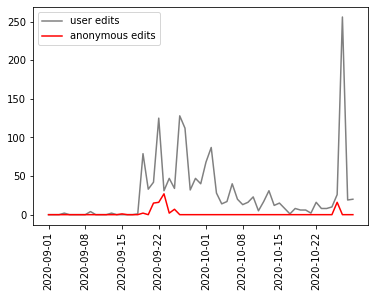

In [203]:
plt.plot(merged_data['timestamp'], merged_data['user edits'], color="gray")
plt.plot(merged_data['timestamp'], merged_data['anonymous edits'], color="red")
plt.xticks(rotation=90)
plt.legend(["user edits", "anonymous edits"])
plt.show()

# ⚠️ Wikipedia Edits Plot
✏️ *Now it's time for a challenge!*

Try to visualize user edits and anonymous edits of two Wikipedia language versions of an article of your choice. We probably use more Wikipedia and wikidata during the next exercises, so it's worse getting familiar.

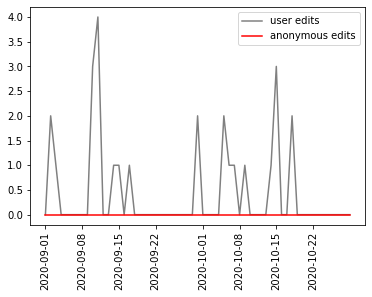

In [211]:
import json
import matplotlib.pyplot as plt
import datetime

headers = {
    'User-Agent': 'https://github.com/YOURUSERNAME',
    'From': 'YOURMAIL'
}

# Edpoint for getting Edits per Page
ep1 = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/en.wikipedia/Timothée_Chalamet/anonymous/daily/20200901/20201030'
ep2 = 'https://wikimedia.org/api/rest_v1/metrics/edits/per-page/en.wikipedia/Timothée_Chalamet/user/daily/20200901/20201030'

call1 = requests.get(ep1, headers=headers)
response1 = call1.json()

call2 = requests.get(ep2, headers=headers)
response2 = call2.json()

anon_data = pd.json_normalize(response1, ['items', 'results'])
user_data = pd.json_normalize(response2, ['items', 'results'])

merged_data = pd.merge(anon_data, user_data, on='timestamp', how='outer')
merged_data = merged_data.rename(columns={"edits_x": "anonymous edits", "edits_y": "user edits"})

merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

plt.plot(merged_data['timestamp'], merged_data['user edits'], color="gray")
plt.plot(merged_data['timestamp'], merged_data['anonymous edits'], color="red")
plt.xticks(rotation=90)
plt.legend(["user edits", "anonymous edits"])
plt.show()

✏️ *Optional task using `covid_json`:*

Try to visualize the positive cases per million over time for three countries of your choosing! There are several steps to it: First you need to convert the date column to a pandas date column using ```pd.to_datetime```, then you filter by the countries and finally you can visualize it.

***

#### Sources
- [Pandas Tutorial: DataFrames in Python - DataCamp](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Introduction to Pandas
](https://www.ritchieng.com/pandas-introduction/)
- [The ElementTree XML API](https://docs.python.org/2/library/xml.etree.elementtree.html)
- [Where do Mayors Come From? Querying Wikidata with Python and SPARQL - Towards Data Science](https://towardsdatascience.com/where-do-mayors-come-from-querying-wikidata-with-python-and-sparql-91f3c0af22e2)
- [Loading data: Drive, Sheets, and Google Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb) 
- [Examining Data Using Pandas | Linux Journal](https://www.linuxjournal.com/content/examining-data-using-pandas)
- [Wikimedia API](https://wikimedia.org/api/rest_v1/#/)
- [The 7 most popular ways to plot data in Python](https://opensource.com/article/20/4/plot-data-python)
- [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

***

#### Credits

This tutorial is adapted from the course [Data Visualization - Winter Term 2020/21](https://github.com/FUB-HCC/dataviz_course_2020) of HCC of Freie Universität Berlin. Many thanks to [Dr. Christoph Kinkeldey](https://www.mi.fu-berlin.de/en/inf/groups/hcc/members/postdocs/kinkeldey.html) and [Tim korjakow](https://github.com/wittenator). Please note: Originally, the couse was adapted from [Information Visualization - Summer Term 2020](https://infovis.fh-potsdam.de/tutorials/) of Marian Dörk by [Fachhochschule Potsdam](https://www.fh-potsdam.de/).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).